# Sensor Based Activity Recoginition 
Challenge: cdl1 - Sensor based Activity Recognition  
Team: Lea Bütler, Manjavy Kirupa, Etienne Roulet, Si Ben Tran  

Aufgabe: ML Modell erstellen

Hier in diesem Notebook erstellen wir unsere Machine Learning Modelle.

---

# Libraries Importieren

In [1]:
# Data Science Libraries
import pandas as pd
import matplotlib.pyplot as plt

# Sklearn Libraries

## import logistic regression
from sklearn.linear_model import LogisticRegression

## Train Validation Split
from sklearn.model_selection import train_test_split

## import metrics 

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

## Decision Tree
from sklearn.tree import DecisionTreeClassifier

## Random Forest
from sklearn.ensemble import RandomForestClassifier



# Daten einlesen

In [2]:
# File: Alle_Messungen.csv (Raw Data) einlesen
raw_unprocessed_data = pd.read_csv("..\Sensor_Data-Wrangling-und-EDA\Alle_Messungen.csv", index_col=0)

# display head 
raw_unprocessed_data.head()

,time,Accelerometer_x,Accelerometer_y,Accelerometer_z,Gyroscope_x,Gyroscope_y,Gyroscope_z,Magnetometer_x,Magnetometer_y,Magnetometer_z,Orientation_qx,Orientation_qy,Orientation_qz,id,user,class,id_combined
0,2023-02-27 15:02:04.548,0.000,-3.552,-9.140,NaN,NaN,NaN,NaN,NaN,NaN,0.161765,-0.088290,-0.470671,01_SamsungA22-2023-02-27_15-02-03,Ben_Tran,Laufen,01_SamsungA22-2023-02-27_15-02-03Ben_TranLaufen
1,2023-02-27 15:02:17.156,0.000,9.722,1.278,NaN,NaN,NaN,NaN,NaN,NaN,-0.217750,-0.719579,0.631111,01_SamsungA22-2023-02-27_15-02-03,Ben_Tran,Laufen,01_SamsungA22-2023-02-27_15-02-03Ben_TranLaufen
2,2023-02-27 15:02:31.574,-0.728,9.779,0.000,NaN,NaN,NaN,NaN,NaN,NaN,-0.420650,0.568356,-0.598058,01_SamsungA22-2023-02-27_15-02-03,Ben_Tran,Laufen,01_SamsungA22-2023-02-27_15-02-03Ben_TranLaufen
3,2023-02-27 15:02:16.685,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,43.5,-13.143750,NaN,NaN,NaN,01_SamsungA22-2023-02-27_15-02-03,Ben_Tran,Laufen,01_SamsungA22-2023-02-27_15-02-03Ben_TranLaufen
4,2023-02-27 15:02:32.295,NaN,NaN,NaN,NaN,NaN,NaN,-13.012501,0.0,20.587502,NaN,NaN,NaN,01_SamsungA22-2023-02-27_15-02-03,Ben_Tran,Laufen,01_SamsungA22-2023-02-27_15-02-03Ben_TranLaufen


## Preprocessing der Daten für Baseline Modell

Für das Baseline Modell werden die Daten wie folgt verarbeitet:

- Entfernen der Zeilen, die NaN Werte aufweisen
- Die Anzahl Observationen gleichmässig auf die minimale Anzahl Observationen pro Klasse sampeln
- Die Daten werden in Trainings und Validierungsdaten gesplittet, dabei sollten die Anzahl der Werte in 'class' gleichmaessig verteilt sein
- Die Verteilung der Klassen wird mittels einem Barplot gezeigt
- Das erstellen eines Logistischen Regression Modell fuer multiple Klassen, mittels sklearn
- Berechnung der Accuracy sowie Visualisierung der Confusion Matrix

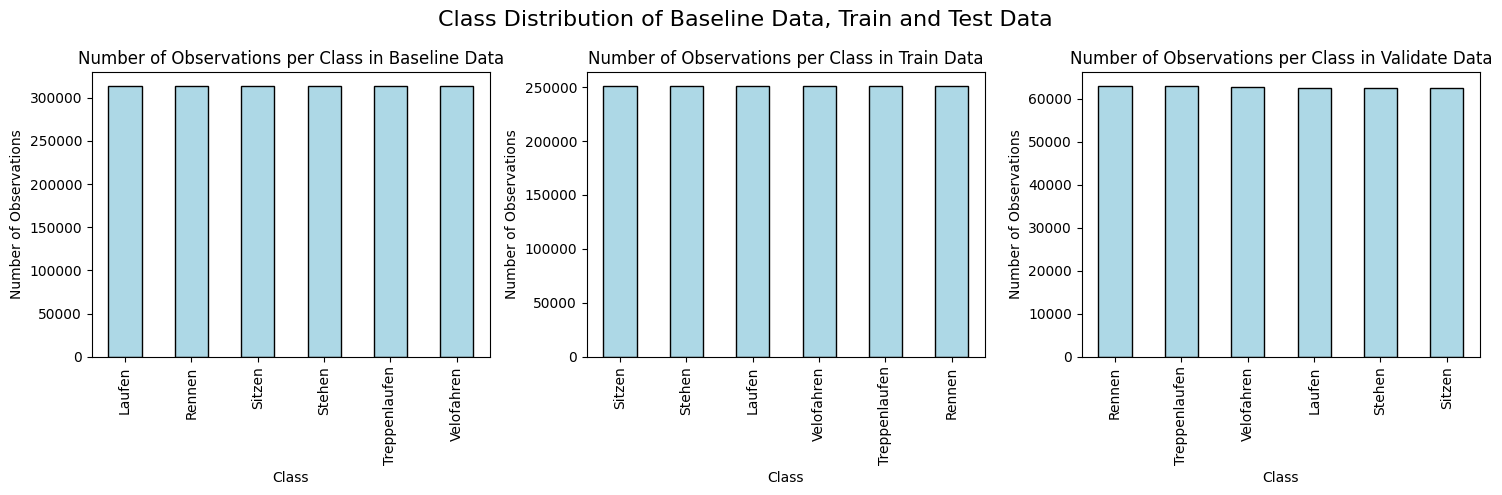

In [3]:
# remove na rows from raw_unprocessed_data
raw_unprocessed_data = raw_unprocessed_data.dropna(axis = 0)

# drop uneccessary columns for the baseline modell
baseline_data = raw_unprocessed_data.drop(['time', 'id', 'user', 'id_combined'], axis = 1)

# get the number of observation for each class and select the minimum
min_class = baseline_data['class'].value_counts().min()

# Select the min_class of each class to get an equal number of observations for each class
baseline_data = baseline_data.groupby('class').sample(n = min_class, random_state=42)

# split the data into baselin_train_X, baseline_train_y, baseline_test_X, baseline_test_y 
baseline_train_X, baseline_val_X, baseline_train_y, baseline_val_y = train_test_split(baseline_data.drop('class', axis = 1), baseline_data['class'], test_size = 0.2, random_state = 42)

# plot the class distribution of the baselin_data, baseline_train_y and baseline_test_y in 3 subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (15, 5))

# plot the class distribution of the baseline_data
baseline_data['class'].value_counts().plot(kind = "bar", ax = ax1, color = "lightblue", edgecolor = "black", linewidth = 1)
ax1.set_xlabel("Class")
ax1.set_ylabel("Number of Observations")
ax1.set_title("Number of Observations per Class in Baseline Data")

# plot the class distribution of the baseline_train_y
baseline_train_y.value_counts().plot(kind = "bar", ax = ax2, color = "lightblue", edgecolor = "black", linewidth = 1)
ax2.set_xlabel("Class")
ax2.set_ylabel("Number of Observations")
ax2.set_title("Number of Observations per Class in Train Data")

# plot the class distribution of the baseline_test_y
baseline_val_y.value_counts().plot(kind = "bar", ax = ax3, color = "lightblue", edgecolor = "black", linewidth = 1)
ax3.set_xlabel("Class")
ax3.set_ylabel("Number of Observations")
ax3.set_title("Number of Observations per Class in Validate Data")

# set the title of the figure and optimize the layout of the subplots
fig.suptitle("Class Distribution of Baseline Data, Train and Test Data", fontsize = 16)
plt.tight_layout()
plt.show()


---
# Baseline Modell 

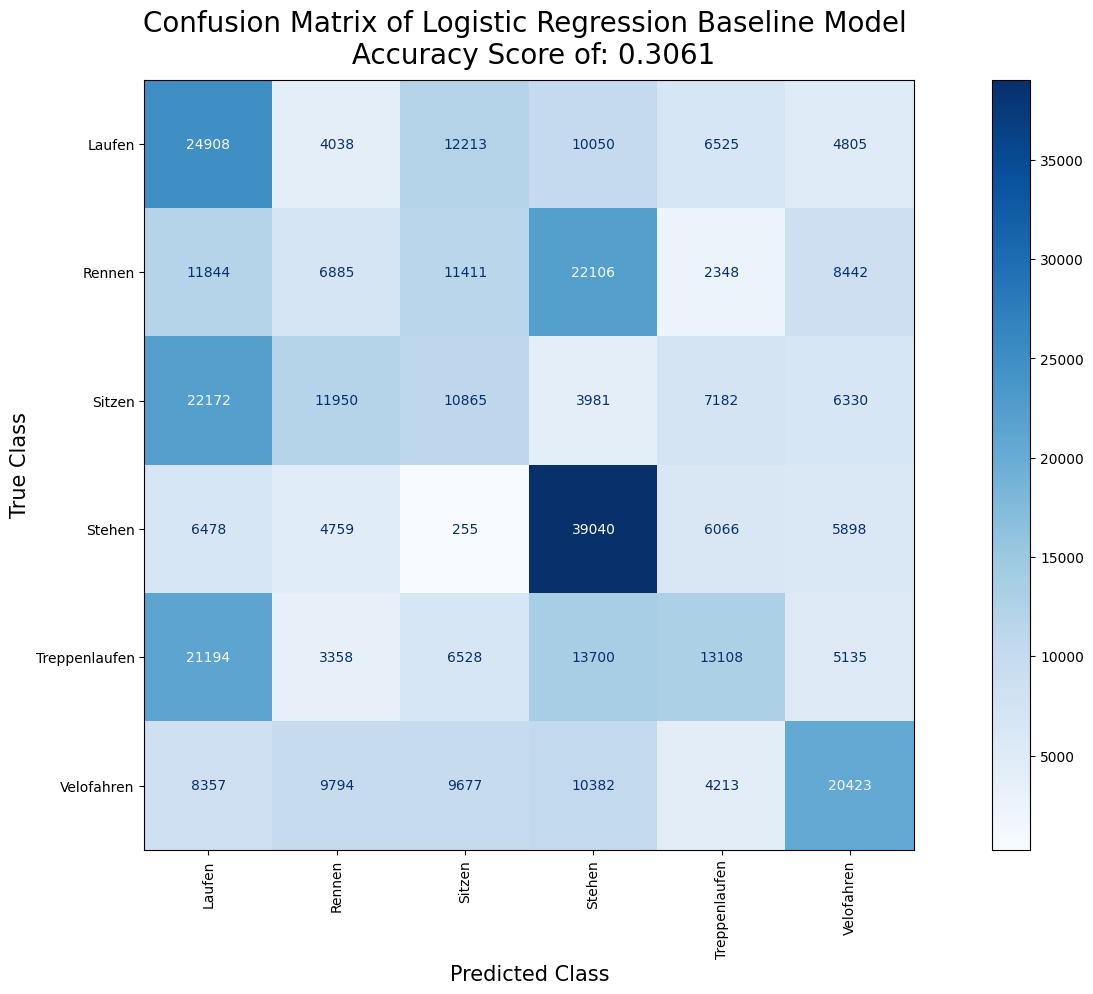

In [4]:
# create a logistic regression model for multiclass classification with sklearn
logistic_regression = LogisticRegression(multi_class = "multinomial", solver = "lbfgs", max_iter = 1000)

# fit the logistic regression model
logistic_regression.fit(X = baseline_train_X, y = baseline_train_y)

# predict the classes for the val data
baseline_val_y_pred = logistic_regression.predict(X = baseline_val_X)

# calculate the accuracy of the logistic regression model with train data and val data
baseline_val_accuracy = accuracy_score(y_true = baseline_val_y, y_pred = baseline_val_y_pred)

# create a confusion matrix display
baseline_confmatrix = confusion_matrix(y_true = baseline_val_y, y_pred = baseline_val_y_pred)

# plot the confusion matrix of the logistic regression model
fig, ax = plt.subplots(figsize = (20,10))
disp = ConfusionMatrixDisplay(confusion_matrix=baseline_confmatrix, display_labels=logistic_regression.classes_)
disp.plot(ax = ax, cmap = "Blues", values_format = "d", xticks_rotation = 'vertical')
plt.title("Confusion Matrix of Logistic Regression Baseline Model \n Accuracy Score of: " + str(round(baseline_val_accuracy, 4)), fontsize = 20, y = 1.01)
plt.xlabel("Predicted Class", fontsize = 15)
plt.ylabel("True Class", fontsize = 15)
plt.show()


Unser Baseline Modell ist ein Logistisches Regression Modell. Wir haben uns für dieses Modell entschieden, da es einfach zu implementieren ist und wir so einen Vergleich zu den anderen Machine Learning Modellen erstellen können.

---
# Modell-01 - Decision Tree

In [5]:
# CODE

# Modell erstellen

# Modell trainieren

# Modell Accuracy mittels Validierungsdatensatz

# Confusion Matrix erstellen

## Fazit zu Modell-01 - Decision Tree

blabla

---

# Modell-02 - Random Forest

In [6]:
# CODE

# Modell erstellen

# Modell trainieren

# Modell Accuracy mittels Validierungsdatensatz

# Confusion Matrix erstellen

## Fazit zu Modell-02 - Random Forest

blabla

---

# Modelle vergleichen


,Accuracy Score
Logistic Regression Baseline Model,0.306118


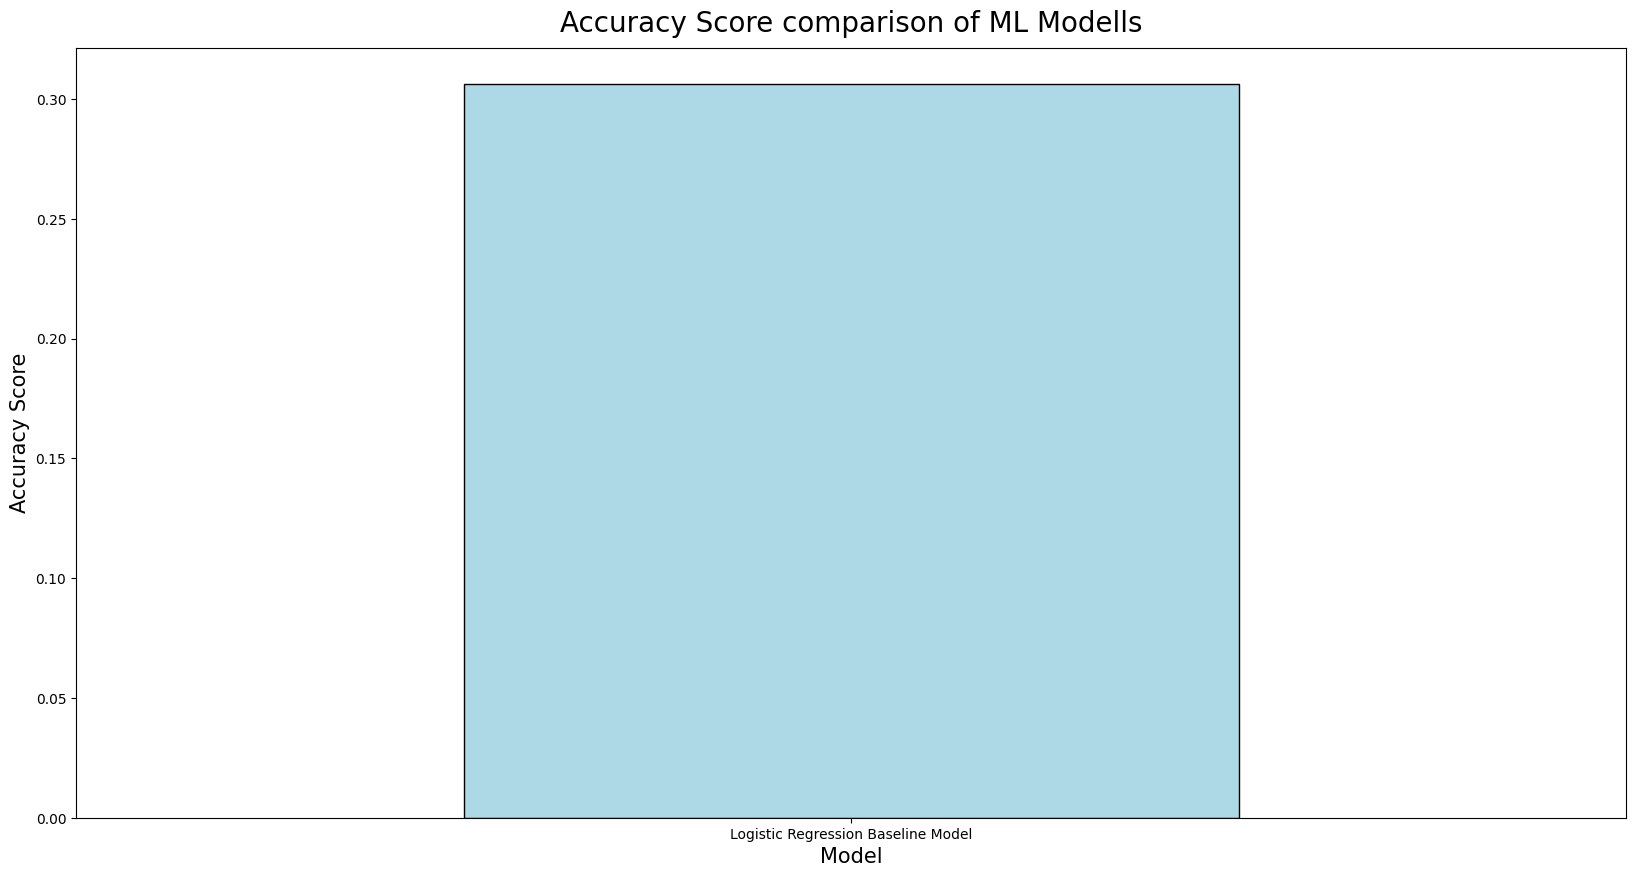

In [9]:
# create a dictionary with the model names as key and the accuracy score as value
model_accuracy_dict = {"Logistic Regression Baseline Model": baseline_val_accuracy}

# create a dataframe from the dictionary
model_accuracy_df = pd.DataFrame.from_dict(model_accuracy_dict, orient = "index", columns = ["Accuracy Score"])

# sort dataframe by accuracy score
model_accuracy_df = model_accuracy_df.sort_values(by = "Accuracy Score", ascending = False)

# display the dataframe 
display(model_accuracy_df)

# create a barplot for comparison 
fig, ax = plt.subplots(figsize = (20,10))
model_accuracy_df.plot(kind = "bar", ax = ax, legend = False, color = "lightblue", edgecolor = "black", linewidth = 1)
# add the accuracy score as text to the barplot
plt.title("Accuracy Score comparison of ML Modells", fontsize = 20, y = 1.01)
plt.xlabel("Model", fontsize = 15)
plt.ylabel("Accuracy Score", fontsize = 15)
plt.xticks(rotation = 0)
plt.show()


## Fazit zu ML Modelle 

blabla

---